In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,LSTM,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
from data_load_full import *
from data_load import *
from architectures import *

torch.manual_seed(12345) # set the random seed for pytorch
np.random.seed(12345) # just in case

In [2]:
## Loading and visualizing the data

## Loading the dataset

X_test, y_test, person_train_valid,X_train_valid,y_train_valid,person_test = load_data()


In [3]:
X_train_valid_prep,y_train_valid_prep = data_prep(X_train_valid,y_train_valid,2,2,True)
x_train, x_valid, x_test, y_train, y_valid, y_test = data_loader_setup1(X_test, y_test, X_train_valid,y_train_valid)

Shape of X after trimming: (2115, 22, 500)
Shape of X after maxpooling: (2115, 22, 250)
Shape of X after averaging+noise and concatenating: (4230, 22, 250)
Shape of X after subsampling and concatenating: (8460, 22, 250)
Shape of X after trimming: (1740, 22, 500)
Shape of X after maxpooling: (1740, 22, 250)
Shape of X after averaging+noise and concatenating: (3480, 22, 250)
Shape of X after subsampling and concatenating: (6960, 22, 250)
Shape of X after trimming: (375, 22, 500)
Shape of X after maxpooling: (375, 22, 250)
Shape of X after averaging+noise and concatenating: (750, 22, 250)
Shape of X after subsampling and concatenating: (1500, 22, 250)
Shape of X after trimming: (443, 22, 500)
Shape of X after maxpooling: (443, 22, 250)
Shape of X after averaging+noise and concatenating: (886, 22, 250)
Shape of X after subsampling and concatenating: (1772, 22, 250)
Shape of testing set: (1772, 22, 250)
Shape of testing labels: (1772,)
Shape of training set: (6960, 22, 250)
Shape of validat

In [4]:
eps = 1e-05

# Building the CNN model using sequential class
basic_cnn_model = Sequential()

# Conv. block 1
basic_cnn_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(250,1,22)))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
basic_cnn_model.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
basic_cnn_model.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
basic_cnn_model.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model.add(Conv2D(filters=200, kernel_size=(100,10), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model.add(Flatten()) # Flattens the input
basic_cnn_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
basic_cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 1, 25)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 84, 1, 25)        100       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 84, 1, 25)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 84, 1, 50)         12550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 1, 50)        0

In [5]:
# Model parameters
learning_rate = 1e-3
epochs = 50
cnn_optimizer = keras.optimizers.Adam(lr=learning_rate)

C:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
# Compiling the model
basic_cnn_model.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
basic_cnn_model_results = basic_cnn_model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_valid, y_valid), verbose=True)


Epoch 1/50
109/109 [==============================] - 107s 969ms/step - loss: 2.0020 - accuracy: 0.3466 - val_loss: 1.3543 - val_accuracy: 0.3280
Epoch 2/50
109/109 [==============================] - 104s 958ms/step - loss: 1.4396 - accuracy: 0.4139 - val_loss: 1.2760 - val_accuracy: 0.3913
Epoch 3/50
109/109 [==============================] - 104s 958ms/step - loss: 1.2728 - accuracy: 0.4687 - val_loss: 1.1199 - val_accuracy: 0.5207
Epoch 4/50
109/109 [==============================] - 103s 942ms/step - loss: 1.1361 - accuracy: 0.5297 - val_loss: 1.0771 - val_accuracy: 0.5453
Epoch 5/50
109/109 [==============================] - 106s 972ms/step - loss: 1.0364 - accuracy: 0.5776 - val_loss: 0.9593 - val_accuracy: 0.5893
Epoch 6/50
109/109 [==============================] - 112s 1s/step - loss: 0.9660 - accuracy: 0.6092 - val_loss: 0.9331 - val_accuracy: 0.6453
Epoch 7/50
109/109 [==============================] - 114s 1s/step - loss: 0.9118 - accuracy: 0.6234 - val_loss: 1.0315 - val_a

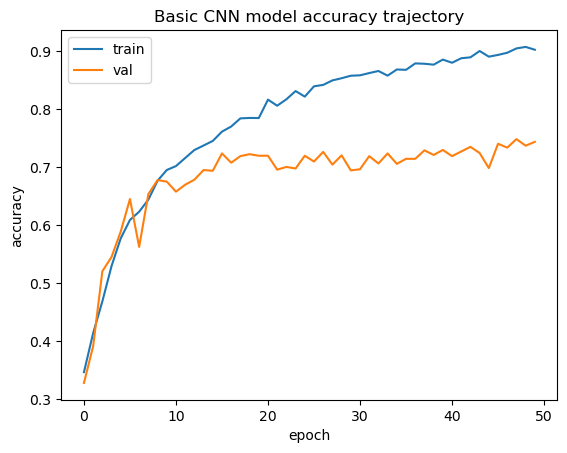

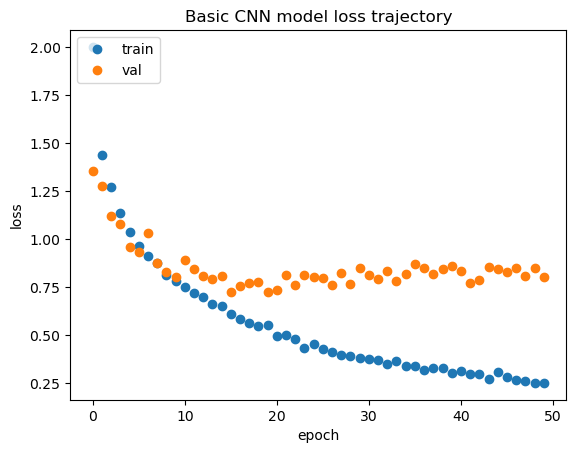

In [7]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(basic_cnn_model_results.history['accuracy'])
plt.plot(basic_cnn_model_results.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(basic_cnn_model_results.history['loss'],'o')
plt.plot(basic_cnn_model_results.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
## Testing the basic CNN model

cnn_score = basic_cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the basic CNN model:',cnn_score[1])

Test accuracy of the basic CNN model: 0.6958239078521729


In [11]:
eps = 1e-05

# Building the CNN + LSTM model using sequential class
hybrid_cnn_lstm_model = Sequential()

# Conv. block 1
hybrid_cnn_lstm_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(250,1,22)))
hybrid_cnn_lstm_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
hybrid_cnn_lstm_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
hybrid_cnn_lstm_model.add(Dropout(0.5))

# Conv. block 2
hybrid_cnn_lstm_model.add(Conv2D(filters=50, kernel_size=(25,10), padding='same', activation='elu'))
hybrid_cnn_lstm_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
hybrid_cnn_lstm_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
hybrid_cnn_lstm_model.add(Dropout(0.5))

# Conv. block 3
hybrid_cnn_lstm_model.add(Conv2D(filters=100, kernel_size=(50,10), padding='same', activation='elu'))
hybrid_cnn_lstm_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
hybrid_cnn_lstm_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
hybrid_cnn_lstm_model.add(Dropout(0.5))

# Conv. block 4
hybrid_cnn_lstm_model.add(Conv2D(filters=200, kernel_size=(100,10), padding='same', activation='elu'))
hybrid_cnn_lstm_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
hybrid_cnn_lstm_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
hybrid_cnn_lstm_model.add(Dropout(0.5))

# FC+LSTM layers
hybrid_cnn_lstm_model.add(Flatten()) # Adding a flattening operation to the output of CNN block
hybrid_cnn_lstm_model.add(Dense((100))) # FC layer with 100 units
hybrid_cnn_lstm_model.add(Reshape((100,1))) # Reshape my output of FC layer so that it's compatible
hybrid_cnn_lstm_model.add(LSTM(10, dropout=0.6, recurrent_dropout=0.1, input_shape=(100,1), return_sequences=False))


# Output layer with Softmax activation 
hybrid_cnn_lstm_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
hybrid_cnn_lstm_model.summary()







Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 84, 1, 25)        0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 84, 1, 25)        100       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 84, 1, 25)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 84, 1, 50)         312550    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 28, 1, 50)       

In [12]:
hybrid_cnn_lstm_optimizer = keras.optimizers.Adam(lr=learning_rate)

# Compiling the model
hybrid_cnn_lstm_model.compile(loss='categorical_crossentropy',
                 optimizer=hybrid_cnn_lstm_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
hybrid_cnn_lstm_model_results = hybrid_cnn_lstm_model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_valid, y_valid), verbose=True)



Epoch 1/50
109/109 [==============================] - 121s 1s/step - loss: 1.3750 - accuracy: 0.3073 - val_loss: 1.3485 - val_accuracy: 0.3207
Epoch 2/50
109/109 [==============================] - 117s 1s/step - loss: 1.3190 - accuracy: 0.3533 - val_loss: 1.3154 - val_accuracy: 0.3940
Epoch 3/50
109/109 [==============================] - 117s 1s/step - loss: 1.2685 - accuracy: 0.3925 - val_loss: 1.2929 - val_accuracy: 0.3807
Epoch 4/50
109/109 [==============================] - 117s 1s/step - loss: 1.2236 - accuracy: 0.4194 - val_loss: 1.2471 - val_accuracy: 0.4233
Epoch 5/50
109/109 [==============================] - 118s 1s/step - loss: 1.2050 - accuracy: 0.4422 - val_loss: 1.2725 - val_accuracy: 0.3740
Epoch 6/50
109/109 [==============================] - 117s 1s/step - loss: 1.1494 - accuracy: 0.4779 - val_loss: 1.2096 - val_accuracy: 0.4540
Epoch 7/50
109/109 [==============================] - 116s 1s/step - loss: 1.1043 - accuracy: 0.5034 - val_loss: 1.2234 - val_accuracy: 0.4493

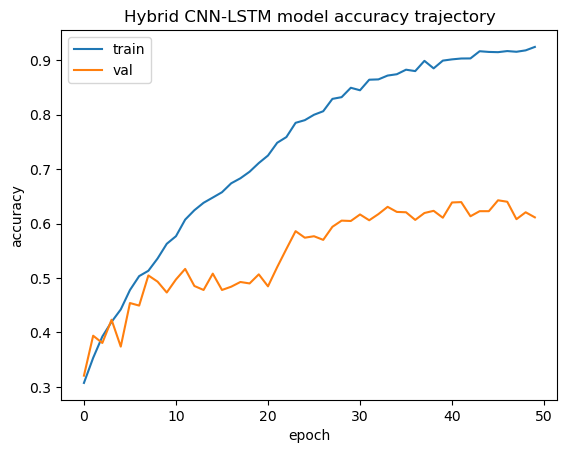

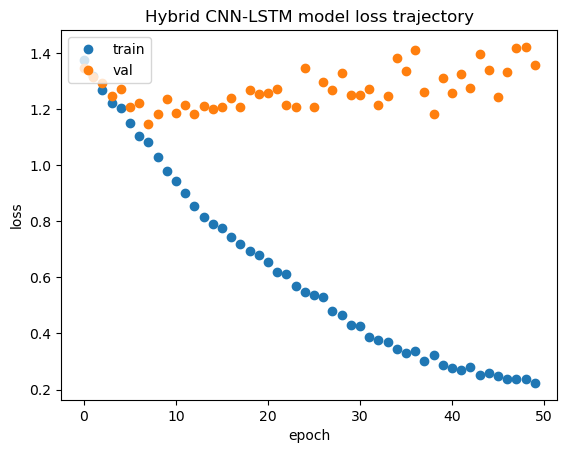

In [13]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(hybrid_cnn_lstm_model_results.history['accuracy'])
plt.plot(hybrid_cnn_lstm_model_results.history['val_accuracy'])
plt.title('Hybrid CNN-LSTM model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(hybrid_cnn_lstm_model_results.history['loss'],'o')
plt.plot(hybrid_cnn_lstm_model_results.history['val_loss'],'o')
plt.title('Hybrid CNN-LSTM model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
## Testing the hybrid CNN-LSTM model

hybrid_cnn_lstm_score = hybrid_cnn_lstm_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the hybrid CNN-LSTM model:',hybrid_cnn_lstm_score[1])

Test accuracy of the hybrid CNN-LSTM model: 0.6100451350212097


In [15]:
from keras.layers import GRU
eps = 1e-05

# Building the CNN model using sequential class
hybrid_cnn_gru_model = Sequential()

# Conv. block 1
hybrid_cnn_gru_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(250,1,22)))
hybrid_cnn_gru_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
hybrid_cnn_gru_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
hybrid_cnn_gru_model.add(Dropout(0.5))

# Conv. block 2
hybrid_cnn_gru_model.add(Conv2D(filters=50, kernel_size=(25,10), padding='same', activation='elu'))
hybrid_cnn_gru_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
hybrid_cnn_gru_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
hybrid_cnn_gru_model.add(Dropout(0.5))

# Conv. block 3
hybrid_cnn_gru_model.add(Conv2D(filters=100, kernel_size=(50,10), padding='same', activation='elu'))
hybrid_cnn_gru_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
hybrid_cnn_gru_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
hybrid_cnn_gru_model.add(Dropout(0.5))

# Conv. block 4
hybrid_cnn_gru_model.add(Conv2D(filters=200, kernel_size=(100,10), padding='same', activation='elu'))
hybrid_cnn_gru_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
hybrid_cnn_gru_model.add(BatchNormalization(epsilon=eps,momentum=0.2))
hybrid_cnn_gru_model.add(Dropout(0.5))

# FC+LSTM layers
hybrid_cnn_gru_model.add(Flatten()) # Adding a flattening operation to the output of CNN block
hybrid_cnn_gru_model.add(Dense((100))) # FC layer with 100 units
hybrid_cnn_gru_model.add(Reshape((100,1))) # Reshape my output of FC layer so that it's compatible
hybrid_cnn_gru_model.add(GRU(10, dropout=0.6, recurrent_dropout=0.1, input_shape=(100,1), return_sequences=False))


# Output layer with Softmax activation 
hybrid_cnn_gru_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
hybrid_cnn_gru_model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 84, 1, 25)        0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 84, 1, 25)        100       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 84, 1, 25)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 84, 1, 50)         312550    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 28, 1, 50)       

In [16]:
hybrid_cnn_gru_optimizer = keras.optimizers.Adam(lr=learning_rate)

# Compiling the model
hybrid_cnn_gru_model.compile(loss='categorical_crossentropy',
                 optimizer=hybrid_cnn_gru_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
hybrid_cnn_gru_model_results = hybrid_cnn_gru_model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_valid, y_valid), verbose=True)



Epoch 1/50
109/109 [==============================] - 119s 1s/step - loss: 1.4126 - accuracy: 0.2698 - val_loss: 1.4148 - val_accuracy: 0.3213
Epoch 2/50
109/109 [==============================] - 115s 1s/step - loss: 1.3657 - accuracy: 0.3119 - val_loss: 1.3644 - val_accuracy: 0.3427
Epoch 3/50
109/109 [==============================] - 115s 1s/step - loss: 1.3334 - accuracy: 0.3534 - val_loss: 1.3020 - val_accuracy: 0.3907
Epoch 4/50
109/109 [==============================] - 116s 1s/step - loss: 1.2894 - accuracy: 0.3846 - val_loss: 1.2801 - val_accuracy: 0.4093
Epoch 5/50
109/109 [==============================] - 114s 1s/step - loss: 1.2636 - accuracy: 0.4029 - val_loss: 1.2447 - val_accuracy: 0.4353
Epoch 6/50
109/109 [==============================] - 116s 1s/step - loss: 1.2290 - accuracy: 0.4283 - val_loss: 1.2264 - val_accuracy: 0.4060
Epoch 7/50
109/109 [==============================] - 116s 1s/step - loss: 1.1992 - accuracy: 0.4395 - val_loss: 1.2597 - val_accuracy: 0.3827

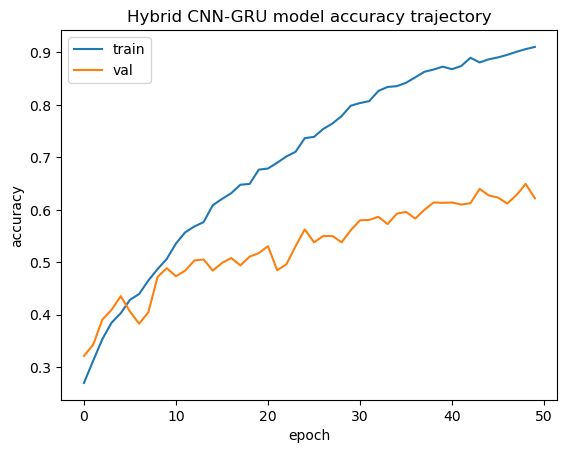

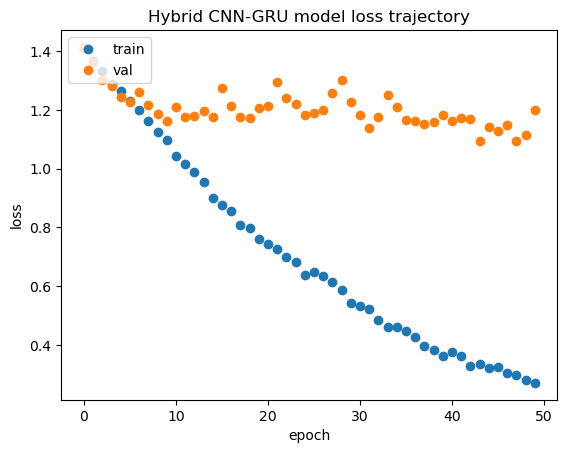

In [17]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(hybrid_cnn_gru_model_results.history['accuracy'])
plt.plot(hybrid_cnn_gru_model_results.history['val_accuracy'])
plt.title('Hybrid CNN-GRU model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(hybrid_cnn_gru_model_results.history['loss'],'o')
plt.plot(hybrid_cnn_gru_model_results.history['val_loss'],'o')
plt.title('Hybrid CNN-GRU model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
## Testing the hybrid CNN-GRU model

hybrid_cnn_gru_score = hybrid_cnn_gru_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the hybrid CNN-GRU model:',hybrid_cnn_gru_score[1])

Test accuracy of the hybrid CNN-GRU model: 0.5993227958679199
